In [ ]:
def train_step(inputs,targets):
    with tf.GradientTape() as tape:
        predictions=model(inputs,training=True)
        loss=loss_fn(targets,predictions)
        gradients=tape.gradients(loss,model.trainable_weights)
        optimizer.apply_gradients(zip(model.trainable_weights,gradients))

In [2]:
from tensorflow import keras
from tensorflow.keras import layers


metric=keras.metrics.SparseCategoricalAccuracy()
targets=[0,1,2]
predictions=[[1,0,0],[0,1,0],[0,0,1]]
metric.update_state(targets,predictions)
current_result=metric.result()


In [3]:
current_result

<tf.Tensor: shape=(), dtype=float32, numpy=1.0>

In [8]:
values = [0, 1]
mean_tracker = keras.metrics.Mean()
for value in values:
 mean_tracker.update_state(value)
 print(mean_tracker.result())
 print(f"Mean of values: {mean_tracker.result():.2f}")
 values.append(7)
 break
print(f"Mean of values: {mean_tracker.result():.2f}")

tf.Tensor(0.0, shape=(), dtype=float32)
Mean of values: 0.00
Mean of values: 0.00


In [9]:
values

[0, 1, 7]

In [21]:
values = [0, 1]
mean_tracker = keras.metrics.Mean()
mean_tracker.update_state(values)
#mean_tracker.result()
values.append(7)
mean_tracker.reset_states()
print(values)
mean_tracker.update_state(values)
mean_tracker.result()

[0, 1, 7]


<tf.Tensor: shape=(), dtype=float32, numpy=2.6666667>

In [ ]:
model=get_mnist_model()
loss_fn=keras.losses.SparseCategoricalCrossentropy()
optimizer=keras.optimizers.RMSprop()
metrics=[keras.metrics.SparseCategoricalAccuracy()]
loss_tracking_metric=keras.metrics.mean()

In [ ]:
def train_step(inputs,targets):
    with tf.GradientTape() as tape:
        predictions=model(inputs,trainin=True)
        loss=loss_fn(targets,predictions)
    gradients=tape.gradient(loss,model.trainable_weights)
    optimizer.apply_gradients(zip(gradients,model.trainable_weights))

In [ ]:
logs={}
for  metric in metrics:
    metric.update_state(targets,predictions)
    logs[metric.name]=metric.result()

loss_tracking_metric.update_state(loss)
logs["loss"]=loss_tracking_metric.result()
return logs

In [23]:
import tensorflow as tf
training_dataset = tf.data.Dataset.from_tensor_slices(
 (train_images, train_labels))

NameError: name 'train_images' is not defined

In [ ]:
@tf.function
def test_step(inputs,targets):
    predictions=model(inputs,training=False)
    loss=loss_fn(targets,predictions)
    logs={}
    for metric in metrics:
        metric.update_state(targets,predictions)
        logs["val"+metric.name]=metric.result()

    loss_tracking_metric.update_state(loss)
    logs["val_loss"]=loss_tracking_metric.result()
    return logs


val_dataset=tf.data.Dataset.from_tensor_slices((val_images,val_labels))
val_dataset=val_dataset.batch(32)
reset_metrics()



In [ ]:
loss_fn=keras.losses.SparseCategoricalCrossentropy()
loss_tracker=keras.metrics.Mean(name='loss')

class CustomModel(keras.Model):
    def train_step(self,data):
        inputs,targets=data
        with tf.GradientTape() as tape:
            predictions=self(inputs,training=True)
            loss=loss_fn(targets,predictions)
            gradients=tape.gradient(loss,model.trainable_weights)
            optimizer.apply_gradients(zip(gradients,model.trainable_weights))


In [27]:
from tensorflow import  keras
from tensorflow.keras import  layers
inputs=keras.Input(shape=(28,28,1))
print(inputs)
x=layers.Conv2D(filters=32,kernel_size=3,activation='relu')(inputs)
x=layers.MaxPooling2D(pool_size=2)(x)
x=layers.Conv2D(filters=64,kernel_size=3,activation='relu')(x)
x=layers.MaxPooling2D(pool_size=2)(x)
x=layers.Conv2D(filters=128,kernel_size=3,activation='relu')(x)
x=layers.Flatten()(x)
outputs=layers.Dense(10,activation='softmax')(x)
model=keras.Model(inputs=inputs,outputs=outputs)

KerasTensor(type_spec=TensorSpec(shape=(None, 28, 28, 1), dtype=tf.float32, name='input_3'), name='input_3', description="created by layer 'input_3'")


In [28]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_1 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 3, 3, 128)         73856 

In [32]:
from tensorflow.keras.datasets import mnist

(train_images,train_labels),(test_images,test_labels)=mnist.load_data()
train_images = train_images.reshape((60000, 28, 28, 1))

In [35]:
train_images=train_images.astype("float32")/255
test_images=test_images.reshape((10000,28,28,1))
test_images=test_images.astype("float32")/255

In [36]:
model.compile(optimizer='rmsprop',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model.fit(train_images,train_labels,epochs=2,batch_size=32)


Epoch 1/2
1875/1875 [==============================] - 27s 14ms/step - loss: 0.1280 - accuracy: 0.9596
Epoch 2/2
1875/1875 [==============================] - 27s 14ms/step - loss: 0.0396 - accuracy: 0.9880


In [37]:
test_loss,test_acc=model.evaluate(test_images,test_labels)
print(test_acc)

313/313 [==============================] - 2s 5ms/step - loss: 0.0316 - accuracy: 0.9897
0.9897000193595886


In [19]:
#DOGSCATS  Challenge

In [38]:
!kaggle competitions download -c dogs-vs-cats

Traceback (most recent call last):
  File "c:\Program Files\Python310\lib\runpy.py", line 196, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "c:\Program Files\Python310\lib\runpy.py", line 86, in _run_code
    exec(code, run_globals)
  File "c:\Users\kusha\AppData\Roaming\Python\Python310\Scripts\kaggle.exe\__main__.py", line 4, in <module>
  File "C:\Users\kusha\AppData\Roaming\Python\Python310\site-packages\kaggle\__init__.py", line 7, in <module>
    api.authenticate()
  File "C:\Users\kusha\AppData\Roaming\Python\Python310\site-packages\kaggle\api\kaggle_api_extended.py", line 407, in authenticate
    raise IOError('Could not find {}. Make sure it\'s located in'
OSError: Could not find kaggle.json. Make sure it's located in C:\Users\kusha\.kaggle. Or use the environment method. See setup instructions at https://github.com/Kaggle/kaggle-api/


from datasets import load_dataset

ds = load_dataset("microsoft/cats_vs_dogs")

In [44]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = "C:/Users/kusha/OneDrive/Desktop/Task/Deep_Learning_Everyday/kaggle.json"

In [46]:
!kaggle datasets download -d tongpython/cat-and-dog


Dataset URL: https://www.kaggle.com/datasets/tongpython/cat-and-dog
License(s): CC0-1.0




  0%|          | 0.00/218M [00:00<?, ?B/s]
  0%|          | 1.00M/218M [00:00<00:30, 7.57MB/s]
  2%|▏         | 4.00M/218M [00:00<00:13, 16.8MB/s]
  4%|▎         | 8.00M/218M [00:00<00:08, 25.3MB/s]
  5%|▌         | 11.0M/218M [00:00<00:09, 22.2MB/s]
  6%|▋         | 14.0M/218M [00:00<00:09, 21.7MB/s]
  8%|▊         | 18.0M/218M [00:00<00:08, 25.9MB/s]
 10%|▉         | 21.0M/218M [00:00<00:07, 26.6MB/s]
 11%|█▏        | 25.0M/218M [00:01<00:06, 29.5MB/s]
 13%|█▎        | 28.0M/218M [00:01<00:07, 27.8MB/s]
 15%|█▍        | 32.0M/218M [00:01<00:06, 30.3MB/s]
 17%|█▋        | 36.0M/218M [00:01<00:05, 32.3MB/s]
 18%|█▊        | 40.0M/218M [00:01<00:05, 33.4MB/s]
 20%|██        | 44.0M/218M [00:01<00:06, 28.9MB/s]
 22%|██▏       | 48.0M/218M [00:01<00:05, 31.0MB/s]
 24%|██▍       | 52.0M/218M [00:02<00:08, 20.1MB/s]
 26%|██▌       | 56.0M/218M [00:02<00:07, 23.5MB/s]
 27%|██▋       | 59.0M/218M [00:02<00:07, 21.6MB/s]
 29%|██▉       | 63.0M/218M [00:02<00:06, 23.6MB/s]
 30%|███       | 66.

In [52]:
import zipfile

with zipfile.ZipFile('cat-and-dog.zip', 'r') as zip_ref:
    zip_ref.extractall('cats_dogs_data')


In [ ]:
from PIL import Image
import os

import os
import shutil

def merge_folders(folder1, folder2, target_folder):
    """Merges files from two folders into a new target folder."""

    # Create target folder if it doesn't exist
    if not os.path.exists(target_folder):
        os.makedirs(target_folder)

    # Copy files from folder1 to target folder
    for item in os.listdir(folder1):
        s = os.path.join(folder1, item)
        t = os.path.join(target_folder, item)

        # Check if the item already exists in the target folder
        if os.path.exists(t):
            print(f"Skipping {item} - already exists in target folder.")
        else:
            shutil.copy2(s, t)

    # Copy files from folder2 to target folder
    for item in os.listdir(folder2):
        s = os.path.join(folder2, item)
        t = os.path.join(target_folder, item)

        # Check if the item already exists in the target folder
        if os.path.exists(t):
            print(f"Skipping {item} - already exists in target folder.")
        else:
            shutil.copy2(s, t)

if __name__ == "__main__":
    folder1 = "C:/Users/kusha/OneDrive/Desktop/Task/Deep_Learning_Everyday/cats_dogs_data/training_set/training_set/cats"  # Replace with your folder paths
    folder2 = "C:/Users/kusha/OneDrive/Desktop/Task/Deep_Learning_Everyday/cats_dogs_data/training_set/training_set/dogs"
    target_folder = "C:/Users/kusha/OneDrive/Desktop/Task/Deep_Learning_Everyday/cats_dogs_data/TR"

    merge_folders(folder1, folder2, target_folder)

Skipping _DS_Store - already exists in target folder.


Skipping cat.1.jpg - already exists in target folder.
Skipping cat.10.jpg - already exists in target folder.
Skipping cat.100.jpg - already exists in target folder.
Skipping cat.1000.jpg - already exists in target folder.
Skipping cat.1001.jpg - already exists in target folder.
Skipping cat.1002.jpg - already exists in target folder.
Skipping cat.1003.jpg - already exists in target folder.
Skipping cat.1004.jpg - already exists in target folder.
Skipping cat.1005.jpg - already exists in target folder.
Skipping cat.1006.jpg - already exists in target folder.
Skipping cat.1007.jpg - already exists in target folder.
Skipping cat.1008.jpg - already exists in target folder.
Skipping cat.1009.jpg - already exists in target folder.
Skipping cat.101.jpg - already exists in target folder.
Skipping cat.1010.jpg - already exists in target folder.
Skipping cat.1011.jpg - already exists in target folder.
Skipping cat.1012.jpg - already exists in target folder.
Skipping cat.1013.jpg - already exists

In [54]:
from PIL import Image
import os

import os
import shutil

def merge_folders(folder1, folder2, target_folder):
    """Merges files from two folders into a new target folder."""

    # Create target folder if it doesn't exist
    if not os.path.exists(target_folder):
        os.makedirs(target_folder)

    # Copy files from folder1 to target folder
    for item in os.listdir(folder1):
        s = os.path.join(folder1, item)
        t = os.path.join(target_folder, item)

        # Check if the item already exists in the target folder
        if os.path.exists(t):
            print(f"Skipping {item} - already exists in target folder.")
        else:
            shutil.copy2(s, t)

    # Copy files from folder2 to target folder
    for item in os.listdir(folder2):
        s = os.path.join(folder2, item)
        t = os.path.join(target_folder, item)

        # Check if the item already exists in the target folder
        if os.path.exists(t):
            print(f"Skipping {item} - already exists in target folder.")
        else:
            shutil.copy2(s, t)

if __name__ == "__main__":
    folder1 = "C:/Users/kusha/OneDrive/Desktop/Task/Deep_Learning_Everyday/cats_dogs_data/test_set/test_set/cats"  # Replace with your folder paths
    folder2 = "C:/Users/kusha/OneDrive/Desktop/Task/Deep_Learning_Everyday/cats_dogs_data/test_set/test_set/dogs"
    target_folder = "C:/Users/kusha/OneDrive/Desktop/Task/Deep_Learning_Everyday/cats_dogs_data/TS"

    merge_folders(folder1, folder2, target_folder)

Skipping _DS_Store - already exists in target folder.


In [227]:
import os

train_images = os.listdir("C:/Users/kusha/OneDrive/Desktop/Task/Deep_Learning_Everyday/cats_dogs_data/TR")
test_images = os.listdir("C:/Users/kusha/OneDrive/Desktop/Task/Deep_Learning_Everyday/cats_dogs_data/TS")

In [228]:
tr="C:/Users/kusha/OneDrive/Desktop/Task/Deep_Learning_Everyday/cats_dogs_data/TR"
ts="C:/Users/kusha/OneDrive/Desktop/Task/Deep_Learning_Everyday/cats_dogs_data/TS"

In [230]:
import PIL
import os
import os.path
from PIL import Image


path = tr
for file in os.listdir(path): 
    f_img = path+"/"+file
    img = Image.open(f_img)
    img = img.resize((250, 250)) #(width, height)
    img.save(f_img)





   

In [231]:
import PIL
import os
import os.path
from PIL import Image


path = ts
for file in os.listdir(path): 
    f_img = path+"/"+file
    img = Image.open(f_img)
    img = img.resize((250, 250)) #(width, height)
    img.save(f_img)
   

In [232]:
tr="C:/Users/kusha/OneDrive/Desktop/Task/Deep_Learning_Everyday/cats_dogs_data/TR"
ts="C:/Users/kusha/OneDrive/Desktop/Task/Deep_Learning_Everyday/cats_dogs_data/TS"

In [233]:


from PIL import Image

# Open the image
image = Image.open("C:/Users/kusha/OneDrive/Desktop/Task/Deep_Learning_Everyday/cats_dogs_data/TR/cat.1.jpg" )

# Get the width and height of the image
width, height = image.size

print("Width:", width)
print("Height:", height)

Width: 250
Height: 250


In [234]:
filenames=[]
categories=[]
for filename in train_images:
    categories.append(1)
filenames.extend(train_images)

import pandas as pd
train_df=pd.DataFrame({'filename':filenames,'category':categories})
#train_df['filename']=train_df['filename'].apply(lambda x:x[:3])
train_df=train_df.head(8004)
train_df['category']=train_df['filename'].apply(lambda x: 0 if 'cat' in x.lower() else 1)


filenames=[]
categories=[]
for filename in test_images:
    categories.append(1)
filenames.extend(test_images)

test_df=pd.DataFrame({'filename':filenames,'category':categories})
#test_df['filename']=test_df['filename'].apply(lambda x:x[:3])
test_df=test_df.head(2022)
test_df['category']=test_df['filename'].apply(lambda x: 0 if 'cat' in x.lower() else 1)

test_df['category'] = test_df['category'].astype(str)
train_df['category'] = train_df['category'].astype(str)

In [235]:
train_df['filename']=train_df['filename'].apply(lambda x: tr+'/'+x)
test_df['filename']=test_df['filename'].apply(lambda x: ts+'/'+x)

In [236]:
from keras.preprocessing.image import ImageDataGenerator
data_gen=ImageDataGenerator()

In [237]:
train_generator=data_gen.flow_from_dataframe(train_df,x_col='filename',y_col='category',class_mode='binary',batch_size=128, target_size=(250,250))

test_generator=data_gen.flow_from_dataframe(test_df,x_col='filename',y_col='category',class_mode='binary',batch_size=128,  target_size=(250,250))

Found 8004 validated image filenames belonging to 2 classes.
Found 2022 validated image filenames belonging to 2 classes.


In [201]:
# understanding tensorflow dataset objects

In [238]:
data_augmentation = keras.Sequential(
 [
 layers.RandomFlip("horizontal"),
 layers.RandomRotation(0.1),
 layers.RandomZoom(0.2),
 ]
)






In [239]:
from tensorflow import  keras
from tensorflow.keras import  layers

inputs = keras.Input(shape=(250, 250, 3))
x=data_augmentation(inputs)
x = layers.Rescaling(1./255)(inputs)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

model.compile(loss="binary_crossentropy",
 optimizer="rmsprop",
 metrics=["accuracy"])

In [240]:
history=model.fit(train_generator,epochs=5,validation_data=test_generator)

Epoch 1/5
63/63 [==============================] - 956s 15s/step - loss: 0.8074 - accuracy: 0.5311 - val_loss: 0.6762 - val_accuracy: 0.5880
Epoch 2/5
63/63 [==============================] - 590s 9s/step - loss: 0.6838 - accuracy: 0.5623 - val_loss: 0.6572 - val_accuracy: 0.6325
Epoch 3/5
63/63 [==============================] - 552s 9s/step - loss: 0.6571 - accuracy: 0.6239 - val_loss: 0.7036 - val_accuracy: 0.5312
Epoch 4/5
63/63 [==============================] - 597s 10s/step - loss: 0.6251 - accuracy: 0.6704 - val_loss: 0.6574 - val_accuracy: 0.5935
Epoch 5/5
63/63 [==============================] - 648s 10s/step - loss: 0.5682 - accuracy: 0.7065 - val_loss: 0.5601 - val_accuracy: 0.7329


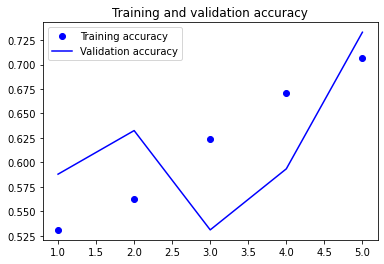

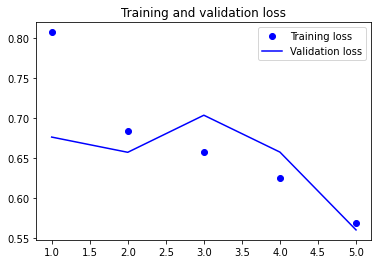

In [241]:
import matplotlib.pyplot as plt
accuracy=history.history['accuracy']
val_accuracy=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history["val_loss"]
epochs=range(1,len(accuracy)+1)
plt.plot(epochs,accuracy,'bo',label='Training accuracy')
plt.plot(epochs,val_accuracy,'b',label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs,loss,'bo',label='Training loss')
plt.plot(epochs,val_loss,'b',label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [242]:
conv_base=keras.applications.vgg16.VGG16(weights='imagenet',include_top=False,input_shape=(250,250,3))

conv_base.summary()

58889256/58889256 [==============================] - 2s 0us/step
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_9 (InputLayer)        [(None, 250, 250, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 250, 250, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 250, 250, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 125, 125, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 125, 125, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 125, 125, 128)     147584    
                                                              

In [ ]:
train_features = []
train_labels = []
for images, labels in train_generator:
    preprocessed_images = keras.applications.vgg16.preprocess_input(images)
    features = conv_base.predict(preprocessed_images)
    train_features.append(features)
    train_labels.append(labels)

# Test dataset feature extraction
test_features = []
test_labels = []
for images, labels in test_generator:
    preprocessed_images = keras.applications.vgg16.preprocess_input(images)
    features = conv_base.predict(preprocessed_images)
    test_features.append(features)
    test_labels.append(labels)

# Convert lists to NumPy arrays for easier handling
import numpy as np
train_features = np.concatenate(train_features)
train_labels = np.concatenate(train_labels)
test_features = np.concatenate(test_features)
test_labels = np.concatenate(test_labels)

3/4 [=====================>........] - ETA: 3s

In [3]:
from tensorflow import keras
from tensorflow.keras import layers

conv_base=keras.applications.vgg16.VGG16(weights='imagenet',include_top=False,input_shape=(250,250,3))



In [5]:
for layers in conv_base.layers:
    print(layers)